In [2]:
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import os 
from datetime import datetime 

In [5]:
#mian data folder
data_dir="../../Dataset/satellite-terminal-data/explore-710/"
g = os.walk(data_dir)  
attach_delay=[]
dirs=[]
dirname=""
i=1
for path,dir_list,file_list in g:  
    for dir_name in dir_list:
        filename=os.path.join(path, dir_name)+"/RM_diagnostic.html"
        # print(filename)  
        processed_data=[]
        try:
            with open(filename) as f:
                lines=f.readlines()
                
                for line in lines:
                    if "sending attach request to GMM, domain CS:YES, PS:NO" in line:
                        send=datetime.strptime(line.split()[1],"%H:%M:%S.%f")
                        sendline=line
                    if "UMTS-REG-ATT-CS: REG_ATTACH_PENDING" in line:
                        attached=datetime.strptime(line.split()[1],"%H:%M:%S.%f")
                        attachedline=line
                if path in dirs and (attached-send).total_seconds() in attach_delay:
                    continue
                else:
                    processed_data.append(sendline)
                    processed_data.append(attachedline)
                    attach_delay.append((attached-send).total_seconds())
                    dirs.append(path)
                f.close()
            if dirname!=filename.split("/")[-3]:
                i=1
                dirname=filename.split("/")[-3]
            else:
                i+=1
            dirpath="data/"+dirname
            filename_after="data/"+dirname+"/"+str(i)+".txt"
            if not os.path.exists(dirpath):
                os.makedirs(dirpath) 
            with open(filename_after,"w") as f:
                for line in processed_data:
                    f.write(line)
                f.close()
        except Exception as e:
            print(e)

            # print(filename)
#remove outliers
attach_delay=[i for i in attach_delay if i<50]

[Errno 2] No such file or directory: '../../Dataset/satellite-terminal-data/explore-710/1-14-2022/RM_diagnostic.html'
[Errno 2] No such file or directory: '../../Dataset/satellite-terminal-data/explore-710/5-15-2021/RM_diagnostic.html'
[Errno 2] No such file or directory: '../../Dataset/satellite-terminal-data/explore-710/6-13-2021/RM_diagnostic.html'
[Errno 2] No such file or directory: '../../Dataset/satellite-terminal-data/explore-710/5-19-2021/RM_diagnostic.html'
[Errno 2] No such file or directory: '../../Dataset/satellite-terminal-data/explore-710/6-11-2021/RM_diagnostic.html'
[Errno 2] No such file or directory: '../../Dataset/satellite-terminal-data/explore-710/6-9-2021/RM_diagnostic.html'
[Errno 2] No such file or directory: '../../Dataset/satellite-terminal-data/explore-710/1-8-2022/RM_diagnostic.html'


In [6]:
attach_delay_sc310=[]
#mian data folder
sc_dir="../../Dataset/satellite-terminal-data/tiantong-sc310/"
g = os.walk(sc_dir)  
dirs=[]
dirname=""
i=1
for path,dir_list,file_list in g:  
    for file_name in file_list:  
        filepath=os.path.join(path, file_name)
        if "data-plane" not in filepath and "txt" in filepath:
            processed_data=[]
            try:
                with open(filepath) as f:
                    lines=f.readlines()
                    send=0
                    attached=0
                    for line in lines:
                        if "GMM current state is S_GMM_REG_INIT" in line and send==0:
                            send=datetime.strptime(line.split(']')[0].split()[1],"%H:%M:%S.%f")
                            # print(line)
                            sendline=line
                        if "GMM current state is S_GMM_REG_S_NORMAL_SERV" in line and attached==0:
                            attached=datetime.strptime(line.split(']')[0].split()[1],"%H:%M:%S.%f")
                            attachedline=line
                            # print(line)
                    if send!=0 and attached!=0 and (attached-send).total_seconds()<50:
                        attach_delay_sc310.append((attached-send).total_seconds())
                        processed_data.append(sendline)
                        processed_data.append(attachedline)
                        dirs.append(path)
                    f.close()
                if len(processed_data)!=0:
                    if dirname!=filepath.split("/")[-2]:
                        i=1
                        dirname=filepath.split("/")[-2]
                    else:
                        i+=1
                    dirpath="data/tiantong-sc310/"+dirname
                    filename_after="data/tiantong-sc310/"+dirname+"/"+str(i)+".txt"
                    print(filename_after)
                    if not os.path.exists(dirpath):
                        os.makedirs(dirpath) 
                    with open(filename_after,"w") as f:
                        for line in processed_data:
                            f.write(line)
                        f.close()
            except Exception as e:
                print(e)
# small data from other folder, for simplicity, we add it here as constant list
#remove outliers
attach_delay_sc310=[i for i in attach_delay_sc310 if i<50]

time data 'current' does not match format '%H:%M:%S.%f'
time data 'current' does not match format '%H:%M:%S.%f'
time data 'current' does not match format '%H:%M:%S.%f'
time data 'current' does not match format '%H:%M:%S.%f'
data/tiantong-sc310/1-14-2022/1.txt
data/tiantong-sc310/1-14-2022/2.txt
data/tiantong-sc310/1-14-2022/3.txt
data/tiantong-sc310/1-14-2022/4.txt
data/tiantong-sc310/1-14-2022/5.txt
data/tiantong-sc310/1-14-2022/6.txt
data/tiantong-sc310/1-14-2022/7.txt
data/tiantong-sc310/1-14-2022/8.txt
data/tiantong-sc310/1-14-2022/9.txt
data/tiantong-sc310/1-14-2022/10.txt
data/tiantong-sc310/1-14-2022/11.txt
data/tiantong-sc310/1-14-2022/12.txt
data/tiantong-sc310/1-14-2022/13.txt
data/tiantong-sc310/1-14-2022/14.txt
data/tiantong-sc310/1-14-2022/15.txt
data/tiantong-sc310/1-14-2022/16.txt
data/tiantong-sc310/1-14-2022/17.txt
data/tiantong-sc310/1-14-2022/18.txt
data/tiantong-sc310/1-14-2022/19.txt
data/tiantong-sc310/1-14-2022/20.txt
data/tiantong-sc310/1-14-2022/21.txt
data/tia

[ 8.211       8.59478571  8.97857143  9.36235714  9.74614286 10.12992857
 10.51371429 10.8975     11.28128571 11.66507143 12.04885714 12.43264286
 12.81642857 13.20021429 13.584     ]


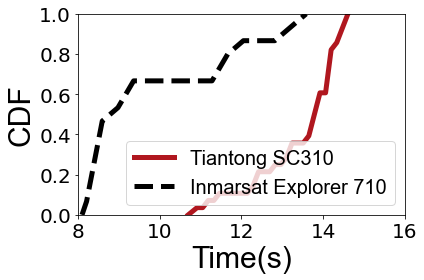

In [4]:


ecdf = sm.distributions.ECDF(attach_delay_sc310)
x = np.linspace(min(attach_delay_sc310), max(attach_delay_sc310), len(attach_delay_sc310))
y = ecdf(x)

ecdf2 = sm.distributions.ECDF(attach_delay)
x_2 = np.linspace(min(attach_delay), max(attach_delay), len(attach_delay))
y_2 = ecdf2(x_2)

font1 = {'family' : 'Arial',
'weight' : 'normal',
'size'   : 30,
}


font2 = {'family' : 'Arial',
'weight' : 'normal',
'size'   : 20,
}
x=np.concatenate([[10.7],x])
y=np.concatenate([[0],y])
print(x_2)
x_2=np.concatenate([[8.1],x_2])
y_2=np.concatenate([[0],y_2])
plt.figure(figsize=(6, 4))
plt.ylim(0, 1)
plt.xlim(8, 16)
plt.plot(x, y,color="#B0171F",linewidth="5", label="Tiantong SC310")
plt.plot(x_2, y_2,linestyle = 'dashed',color="black",linewidth="5",label="Inmarsat Explorer 710")
plt.xlabel("Time(s)",font1)
plt.ylabel("CDF",font1)
plt.legend(prop=font2,loc = 'lower right')

plt.tick_params(labelsize=20)

plt.tight_layout()
plt.savefig('figure5b.pdf')
plt.show()